In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback

# import warnings
# warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


16:14:47 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=741154;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=773312;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


16:14:47 INFO      Starting 3ML!                                                                     ]8;id=513697;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=149874;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=945925;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=195031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=57230;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=390452;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=47836;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=226933;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

16:14:48 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=957561;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=582668;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=840394;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=302747;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=324432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=103731;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

16:14:49 WARNING   No fermitools installed                                              ]8;id=498795;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=260137;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load Mymap:  11%|█         | 4/38 [00:00<00:00, 319.29it/s]     
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


WARNING RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96, got 80


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 232, got 216

ReLoad Mycatalog:  61%|██████    | 23/38 [00:00<00:00, 36.66it/s] 
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load sub from Mystat: : 40it [00:00, 119.02it/s]                            

Yourlib init successfully!!!


Load sub from Mystat: : 40it [00:20, 119.02it/s]

17:26:01 INFO      Region of Interest:                                                                   ]8;id=450888;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=903188;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

         INFO      -------------------                                                                   ]8;id=166814;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=25125;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (6.451, 62.726), model radius: 9.000  ]8;id=312293;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=516401;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  deg, display radius: 7.000 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=456829;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=642979;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=552134;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=640103;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      --------------------                                                                  ]8;id=257773;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=95607;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      Width x height 106 x 106 px                                                           ]8;id=224093;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=428621;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#299\299]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=425503;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=716384;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#304\304]8;;\

         INFO                                                                                            ]8;id=790041;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=268747;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#307\307]8;;\

         INFO      Response:                                                                             ]8;id=173539;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=729307;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      ---------                                                                             ]8;id=863587;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=381533;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      Response file:                                                                   ]8;id=478009;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=294084;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsfnewfix13                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=155877;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=620098;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=434430;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=780464;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=862307;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=701613;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#313\313]8;;\

         INFO      Map Tree:                                                                             ]8;id=937462;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=184813;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      ----------                                                                            ]8;id=717737;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=429845;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,4.861266e+04,5.008973e+04,0.970512,30473,99.90545
1,1,1024,RING,6.225392e+05,6.302343e+05,0.987790,30473,99.90545
2,2,1024,RING,1.474711e+06,1.478598e+06,0.997371,30473,99.90545
3,3,1024,RING,9.074592e+05,9.040691e+05,1.003750,30473,99.90545
4,4,1024,RING,5.672893e+04,5.589661e+04,1.014890,30473,99.90545
5,5,1024,RING,1.298893e+04,1.247318e+04,1.041349,30473,99.90545
6,6,1024,RING,7.389314e+03,7.118481e+03,1.038047,30473,99.90545
7,7,1024,RING,1.361444e+03,1.248756e+03,1.090240,30473,99.90545
8,8,1024,RING,3.664258e+02,3.113442e+02,1.176915,30473,99.90545
9,9,1024,RING,1.400700e+02,9.596736e+01,1.459559,30473,99.90545


         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=952282;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=363384;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.83 Mb                                                         ]8;id=129069;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=67063;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=816057;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=581053;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#319\319]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=550745;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=177827;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#321\321]8;;\

         INFO      -------------------------------                                                       ]8;id=43214;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=482438;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=635753;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=962633;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

17:26:02 INFO      J0007P5659u in model_radius: 9 sf:True pf:True kf:True indexf:True                  ]8;id=253639;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=626344;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=831735;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=385073;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   K=3.30e-17 kb=(1.00e-18, 1.83e-16) index=-3.10 indexb=(-4.10,-2.10)                             

         INFO      Mor: fitrange=0.96                                                                  ]8;id=782181;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=335557;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#360\360]8;;\

         INFO      J0056P6346u in roi: 7.0 sf:False pf:False kf:False indexf:False                     ]8;id=346300;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=627280;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=562996;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=596194;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   K=1.47e-16 kb=(1.47e-18, 4.47e-16) index=-3.33 indexb=(-3.83,-2.83)                             

         INFO      Mor:                                                                                ]8;id=850118;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=335874;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#352\352]8;;\
                   sigma=0.24 sb=(0.00,0.48) fitrange=0.64                                                         

         INFO      Set diffuse range: [111.99999999999999, 127.99999999999999] [-8, 8]                ]8;id=569487;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=764079;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1215\1215]8;;\

         INFO      ra dec coner:                                                                      ]8;id=253048;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=322675;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1216\1216]8;;\

         INFO      (354.5404756046732, 53.30931751856194)                                             ]8;id=8748;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=840812;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1217\1217]8;;\

         INFO      (21.530179643489507, 54.53010117657344)                                            ]8;id=589210;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=847793;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1218\1218]8;;\

         INFO      (27.88407612855055, 70.27813741626653)                                             ]8;id=443788;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=919879;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1219\1219]8;;\

         INFO      (342.41234119072817, 68.24762361726594)                                            ]8;id=141937;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=222938;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1220\1220]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=61056;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=258825;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1259\1259]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 5.974223418436513e-06                                                 ]8;id=921205;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=31663;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1260\1260]8;;\
                  ratio: 0.047145925548641124                                                                      

         INFO      set K to: 5e-18                                                                    ]8;id=893387;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=952224;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1261\1261]8;;\

         INFO      diffuse file path: ../../data/Diffuse_KM2A_case2_dust_bkg_template.fits            ]8;id=772996;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=763677;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1288\1288]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  2
Particle sources  0

Free parameters (7):
--------------------

                                          value min_value max_value   
J0056P6346u.Gaussian_on_sphere.lon0        14.1     13.46     14.74  \
J0056P6346u.Gaussian_on_sphere.lat0       63.77     63.13     64.41   
J0056P6346u.Gaussian_on_sphere.sigma       0.24       0.0      0.48   
J0056P6346u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J0056P6346u.spectrum.main.Powerlaw.index  -3.33     -3.83     -2.83   
Diffuse.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index       -3.0      -5.0      -1.0   

                                                    unit  
J0056P6346u.Gaussian_on_sphere.lon0                  deg  
J0056P6346u.Gaussian_on_sphere.lat0                  deg  
J0056P6346u.Gaussian_on_sphere.sigma                 deg  
J0056P6346u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J0056P6346u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (10):
---------------------

                                                                                      value   
J0007P5659u.position.ra                                                                1.86  \
J0007P5659u.position.dec                                                               57.0   
J0007P5659u.spectrum.main.Powerlaw.K                                                    0.0   
J0007P5659u.spectrum.main.Powerlaw.piv                                        50000000000.0   
J0007P5659u.spectrum.main.Powerlaw.index                                               -3.1   
J0056P6346u.spectrum.main.Powerlaw.piv                                        50000000000.0   
Diffuse.SpatialTemplate_2D.K                                                            1.0   
Diffuse.SpatialTemplate_2D.hash           1854886581294248356459392959281479115904026754...   
Diffuse.SpatialTemplate_2D.ihdu                                                         0.0   
Diffuse.spectrum.main.Powerlaw.piv                                            50000000000.0   

                                         min_value max_value            unit  
J0007P5659u.position.ra                        0.9      2.82             deg  
J0007P5659u.position.dec                     56.04     57.96             deg  
J0007P5659u.spectrum.main.Powerlaw.K           0.0       0.0  keV-1 s-1 cm-2  
J0007P5659u.spectrum.main.Powerlaw.piv        None      None             keV  
J0007P5659u.spectrum.main.Powerlaw.index      -4.1      -2.1                  
J0056P6346u.spectrum.main.Powerlaw.piv        None      None             keV  
Diffuse.SpatialTemplate_2D.K                  None      None           deg-2  
Diffuse.SpatialTemplate_2D.hash               None      None                  
Diffuse.SpatialTemplate_2D.ihdu                0.0      None                  
Diffuse.spectrum.main.Powerlaw.piv            None      None             keV  

Properties (2):
--------------------

                                                                                  value   
Diffuse.SpatialTemplate_2D.fits_file  ../../data/Diffuse_KM2A_case2_dust_bkg_templat...  \
Diffuse.SpatialTemplate_2D.frame                                                   icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

17:26:03 INFO      Considering 5 dec bins for extended source J0056P6346u           ]8;id=993512;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=74429;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 63.770                       ]8;id=95267;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=789233;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 20 dec bins for extended source Diffuse              ]8;id=349005;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=90534;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 61.893                       ]8;id=438326;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=79695;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=193633;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=547942;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=733967;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=279303;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0056P6346u.Gaussian_on_sphere.lon0,(1.402 +/- 0.006) x 10,deg
J0056P6346u.Gaussian_on_sphere.lat0,(6.3801 +/- 0.0026) x 10,deg
J0056P6346u.Gaussian_on_sphere.sigma,(2.72 +/- 0.24) x 10^-1,deg
J0056P6346u.spectrum.main.Powerlaw.K,(1.60 +/- 0.10) x 10^-25,1 / (cm2 keV s)
J0056P6346u.spectrum.main.Powerlaw.index,-3.36 +/- 0.08,
Diffuse.spectrum.main.Powerlaw.K,(2.2 -0.7 +1.0) x 10^-24,1 / (cm2 keV s)
Diffuse.spectrum.main.Powerlaw.index,-3.1 +/- 0.4,


Correlation matrix:

1.00,0.06,0.06,0.03,0.04,-0.00,0.00
0.06,1.00,0.02,0.04,0.01,-0.00,0.00
0.06,0.02,1.00,0.54,-0.04,-0.00,0.00
0.03,0.04,0.54,1.00,-0.02,-0.00,0.00
0.04,0.01,-0.04,-0.02,1.00,-0.00,0.00
-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.59
0.00,0.00,0.00,0.00,0.00,-0.59,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
KM2A,10045.125648
total,10045.125648


Values of statistical measures:

,statistical measures
AIC,20104.251559
BIC,20180.996872


Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

17:26:27 INFO      Considering 5 dec bins for extended source J0056P6346u           ]8;id=809811;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=430680;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 63.801                       ]8;id=444262;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=869742;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 20 dec bins for extended source Diffuse              ]8;id=673939;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=450836;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 61.893                       ]8;id=289953;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=488717;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(13.560606060606062, 62.602623517095594)


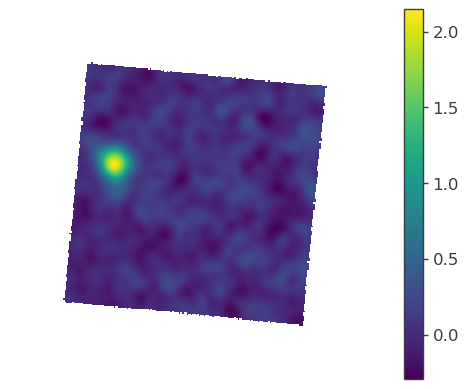

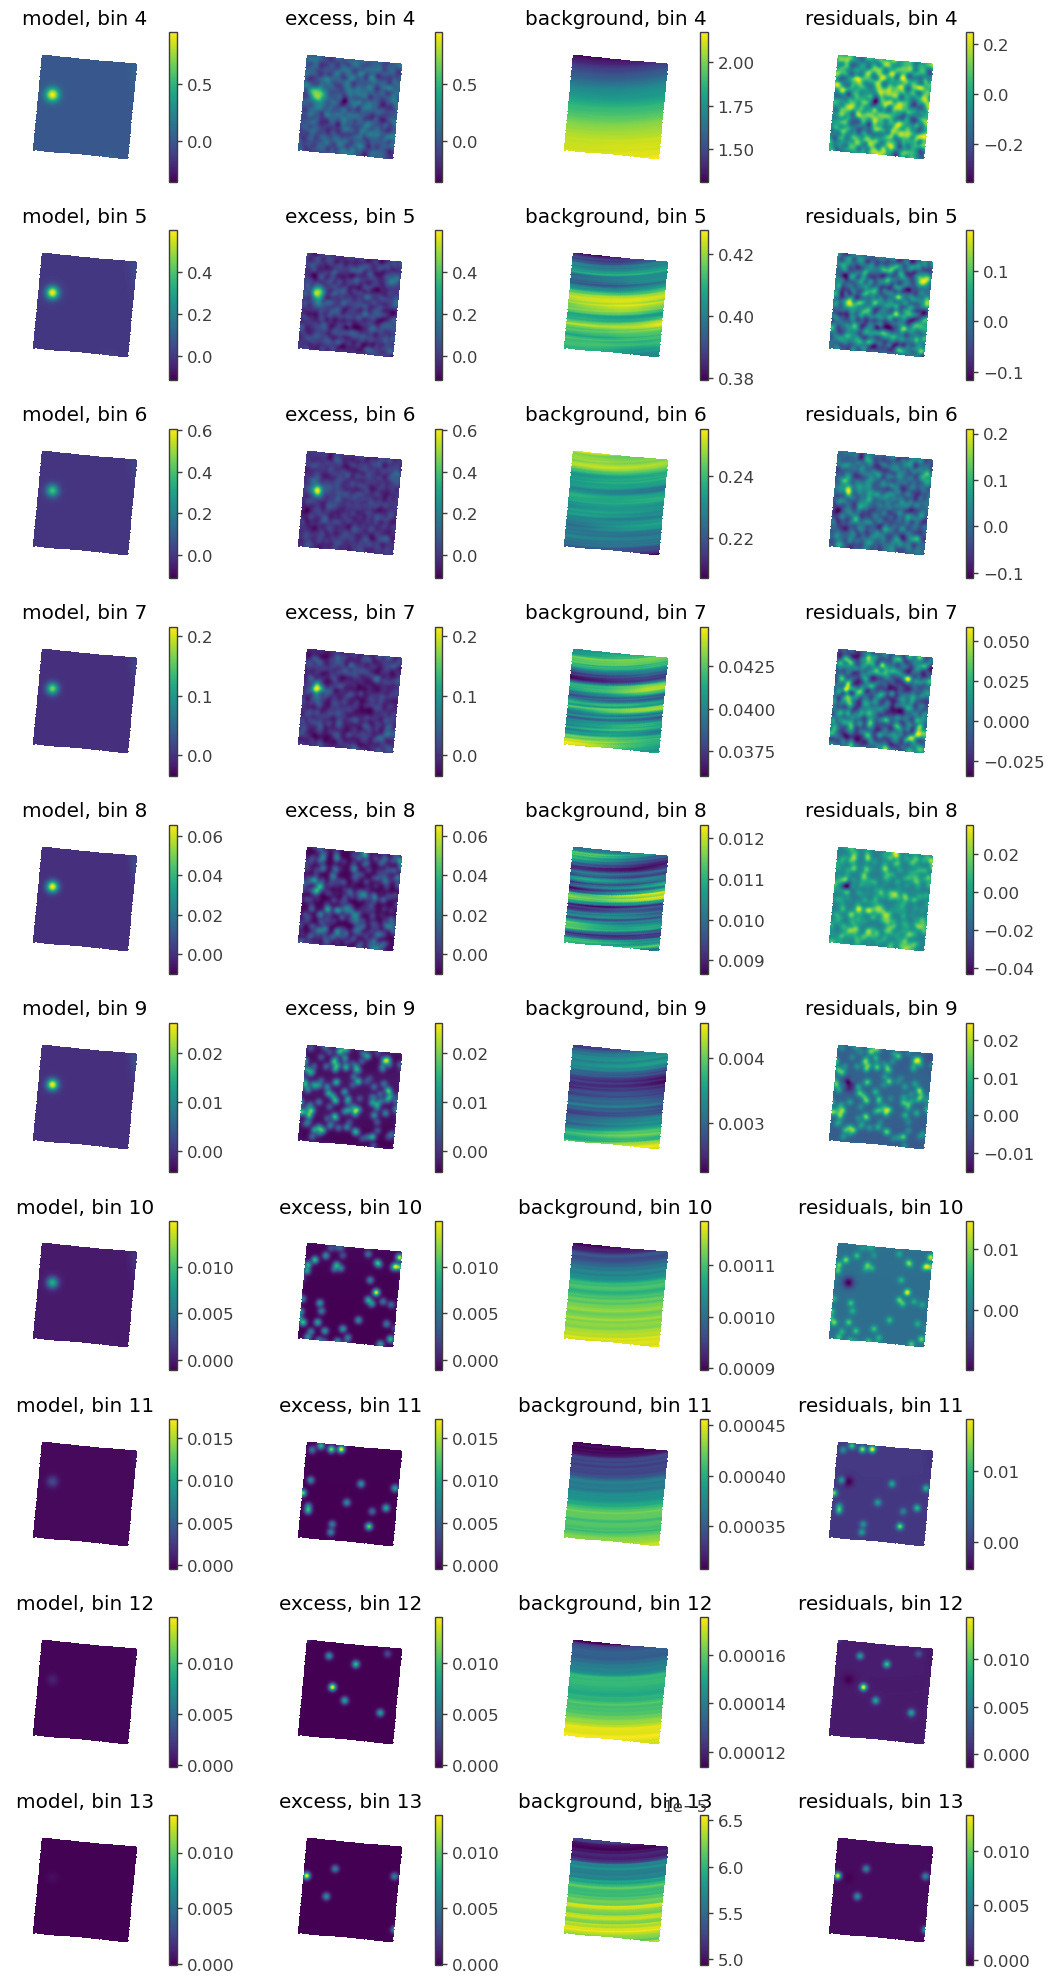

<Figure size 640x480 with 0 Axes>

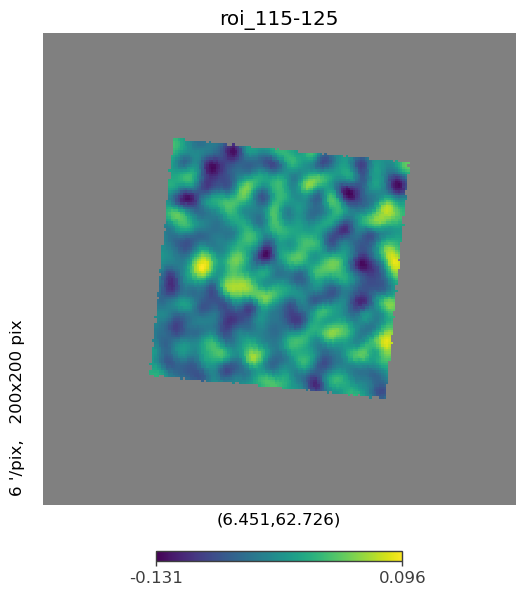

LHAASO:  1 1.86 57.0  1LHAASO J0007+5659u  0.0
LHAASO:  2 1.86 57.0  1KM2A J0007+5659u  0
LHAASO:  3 14.1 63.77  1LHAASO J0056+6346u  0.24
LHAASO:  4 13.78 63.96  1LHAASO J0056+6346u   0.33
TeVCat:  1 6.34 64.13 Tycho 0.0
TeVCat:  2 8.82 59.79 1ES 0033+595 0.0
PSR:  1 6.710666666666667 63.33358333333334 J0026+6320
PSR:  2 8.25 57.0 J0033+57
PSR:  3 8.25 61.0 J0033+61
PSR:  4 8.499999999999998 69.71666666666667 J0034+69
PSR:  5 10.134833333333333 57.273583333333335 J0040+5716
PSR:  6 13.249999999999998 69.65 J0053+69
PSR:  7 13.499999999999998 66.0 J0054+66
PSR:  8 13.616666666666665 69.43333333333334 J0054+69
PSR:  9 14.499999999999998 61.416666666666664 J0058+6125
PSR:  10 15.637333333333334 65.62038888888888 J0102+6537
PSR:  11 17.094333333333328 66.14277777777778 J0108+6608
PSR:  12 17.122916666666665 69.09794444444444 J0108+6905
PSR:  13 17.999999999999996 66.36666666666666 J0112+66
PSR:  14 19.41108333333333 59.244 J0117+5914
PSR:  15 21.499999999999996 62.583333333333336 J0125+62

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(2.6 +/- 2.0) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2347.796386
total,2347.796386


Values of statistical measures:

,statistical measures
AIC,4697.592782
BIC,4708.556426


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(2.4 +/- 1.5) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2300.260796
total,2300.260796


Values of statistical measures:

,statistical measures
AIC,4602.521601
BIC,4613.485245


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.4 +/- 1.5) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2141.086744
total,2141.086744


Values of statistical measures:

,statistical measures
AIC,4284.173497
BIC,4295.137141


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(0.9 +/- 1.4) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1561.803957
total,1561.803957


Values of statistical measures:

,statistical measures
AIC,3125.607923
BIC,3136.571567


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(4.6 +/- 2.3) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,849.828059
total,849.828059


Values of statistical measures:

,statistical measures
AIC,1701.656127
BIC,1712.619771


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(-0.4 +/- 1.4) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,486.26914
total,486.26914


Values of statistical measures:

,statistical measures
AIC,974.538289
BIC,985.501934


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(8 +/- 6) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,178.02032
total,178.02032


Values of statistical measures:

,statistical measures
AIC,358.040649
BIC,369.004293


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(-0 +/- 7) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,114.673929
total,114.673929


Values of statistical measures:

,statistical measures
AIC,231.347867
BIC,242.311511


<Figure size 640x480 with 0 Axes>

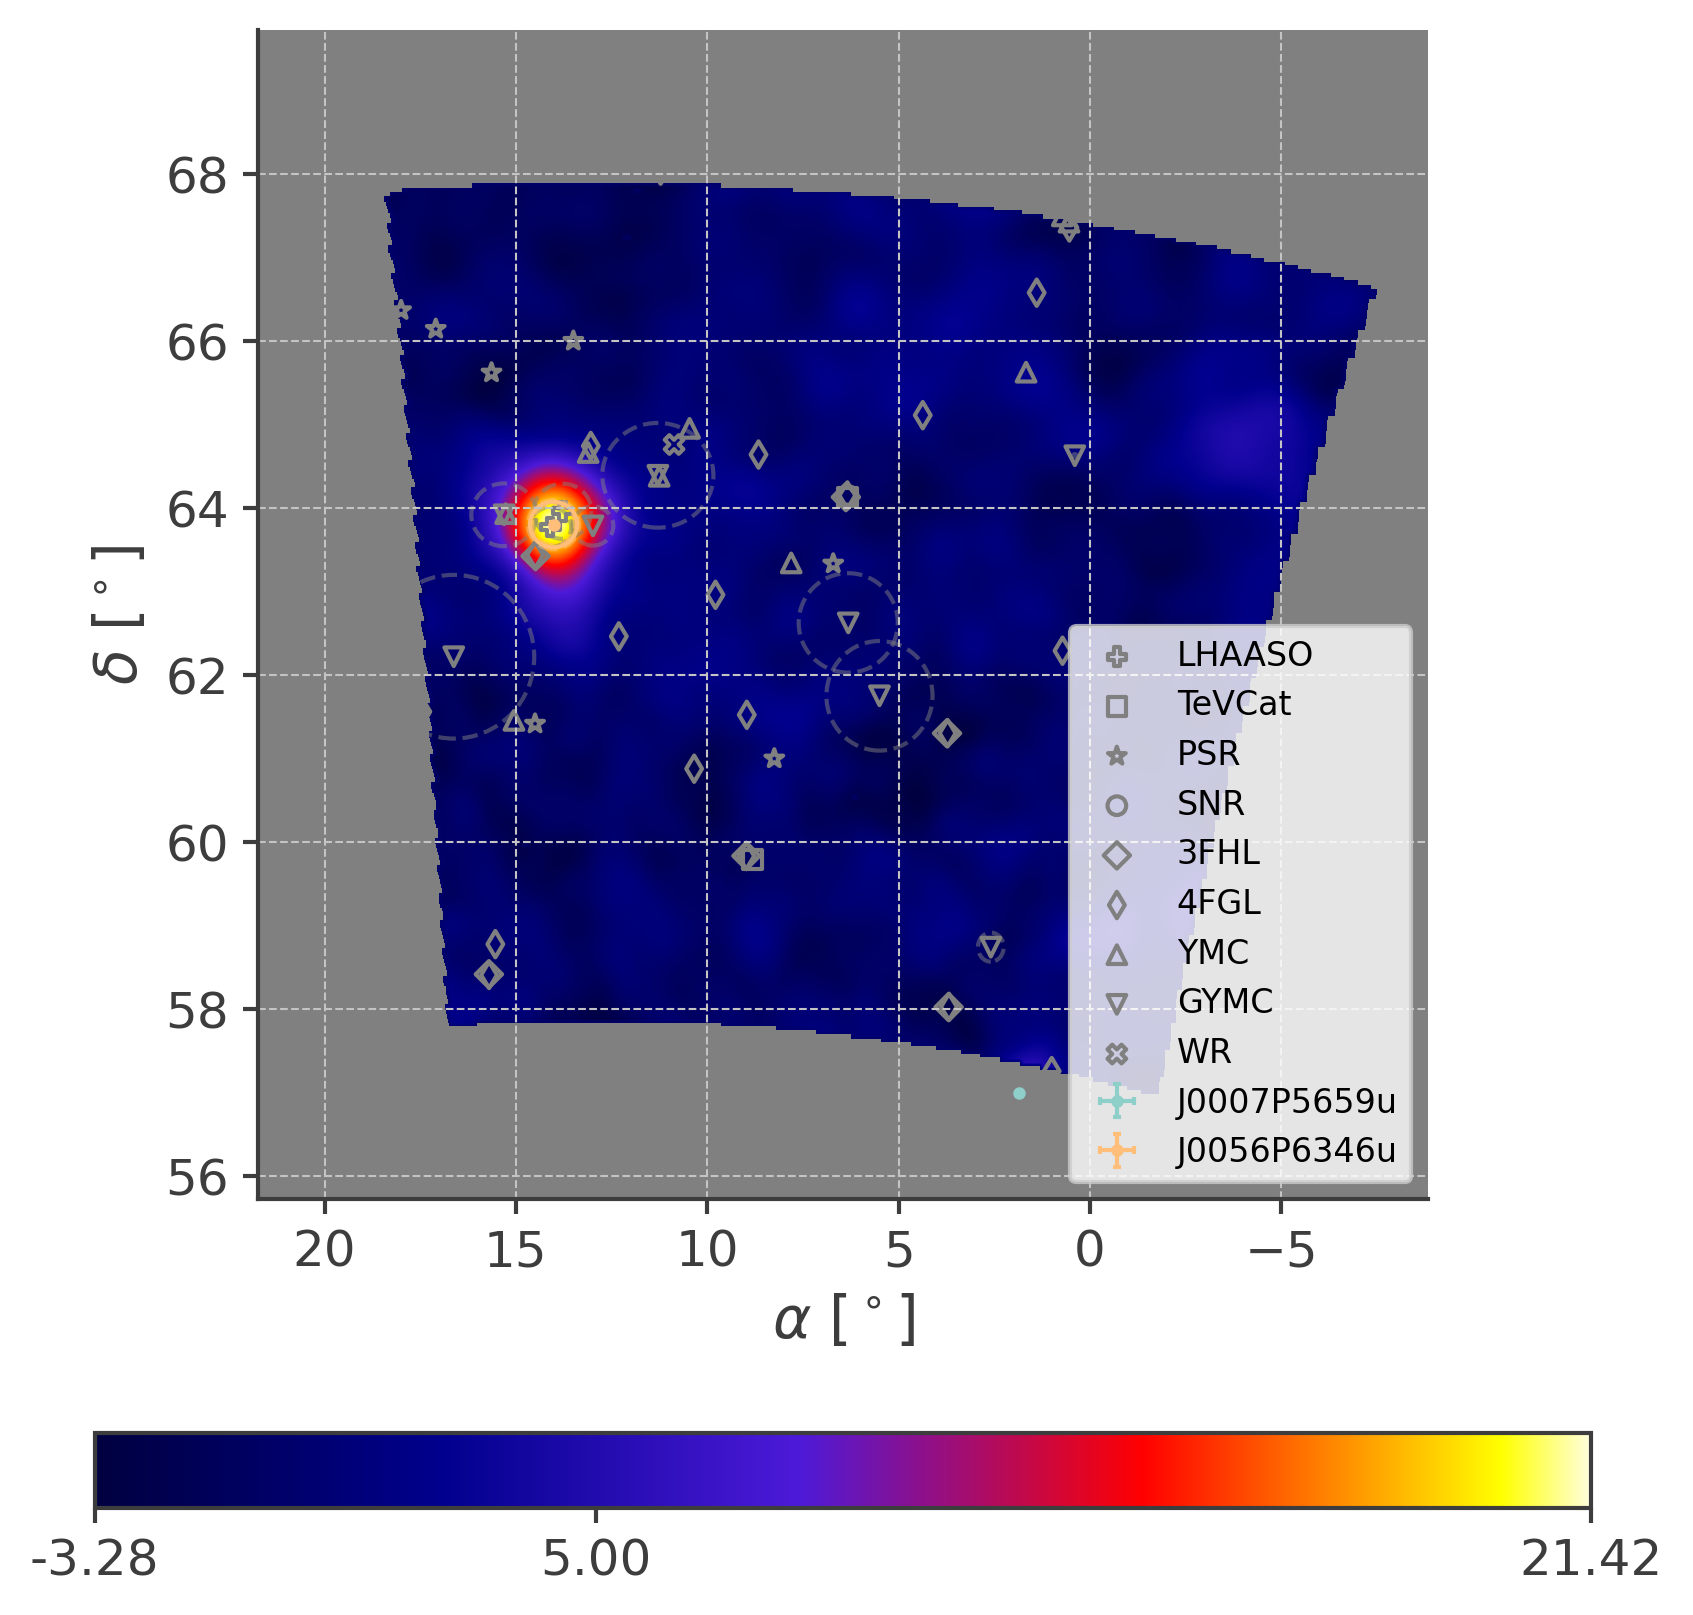

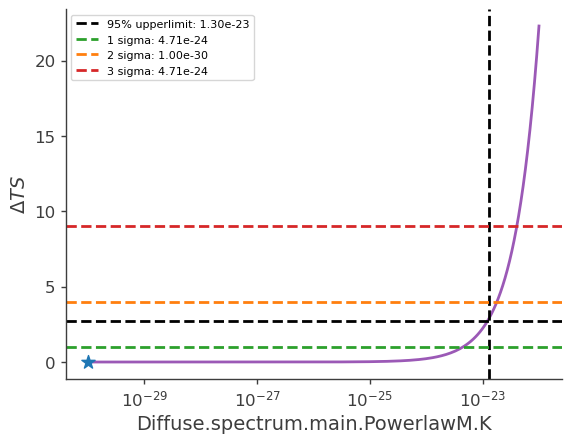

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(-0.0 +/- 1.1) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,32.612832
total,32.612832


Values of statistical measures:

,statistical measures
AIC,67.225673
BIC,78.189317


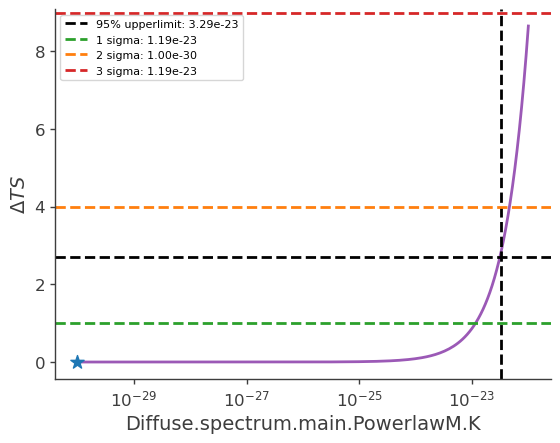

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(-0.0 +/- 2.2) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,30.200429
total,30.200429


Values of statistical measures:

,statistical measures
AIC,62.400868
BIC,73.364513


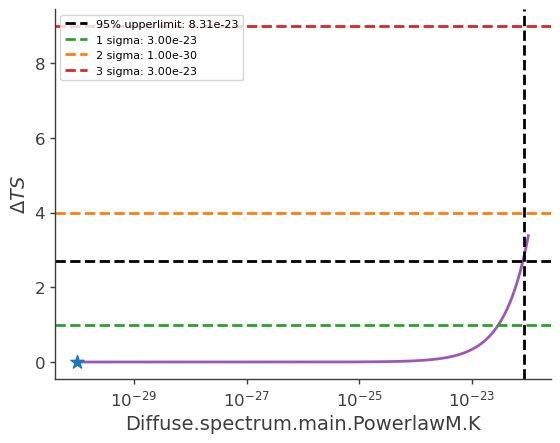


100%|██████████| 10/10 [02:35<00:00, 15.50s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.

100%|██████████| 1/1 [04:23<00:00, 263.98s/it]


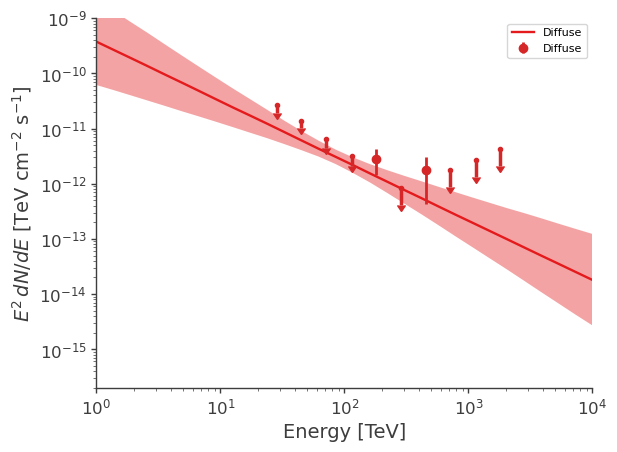

In [26]:
%matplotlib inline
#####   Data Initialize


maptree = "../../data/KM2A1234full_skymap_rcy.root"
# response = "../../data/KM2A1234full_mcpsf_DRfinal.root"
response = "../../data/KM2A1234full_mcpsfnewfix13.root"

region_name="Diffuse_KM2A_case2"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm([120])): #15  range(20,360,10)
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    ra1,dec1=RA_center, Dec_center

    data_radius = 7.0
    model_radius = 9

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    KM2A = HAL("KM2A", maptree, response, roi, flat_sky_pixels_size=0.17)

    #####   Data Situation
    %matplotlib inline
    KM2A.set_active_measurements(4, 13)
    KM2A.display()
    KM2A.psf_integration_method="exact"


    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=8, rtflux=30, rtindex=5, rtp=8,  detector="KM2A", roi=roi, pf=True, sf=True, kf=False, indexf=False, mkf=True, mindexf=True, ifext_mt_2=True) #, fixall=True,  , Kscale= 1e-25 #, indexb=(-5.5, -1.5)

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, piv=50, name=region_name, ifreturnratio=True, indexb=(-5, -1), index=-3, kbratio=1000, K=5e-18,  Kb=(1e-17, 1e-14),
                ) # , , Kn=1e-25
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, KM2A, lm, 4, 13, mini="ROOT") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(KM2A, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_llh-3.5_new.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(KM2A, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, piv=50)
    import matplotlib as mpl

    x_Max=10000.
    x_Min=1
    y_Min=0.2e-15
    y_Max=1e-9
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:
    #     continue


roi_15-25


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_25-35


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_35-45


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_45-55


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_55-65


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_65-75


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_75-85


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_85-95
roi_95-105
roi_105-115
roi_115-125
roi_125-135
roi_135-145
roi_145-155
roi_155-165
roi_165-175
roi_175-185
roi_185-195
roi_195-205
roi_205-215
roi_215-225
roi_225-235


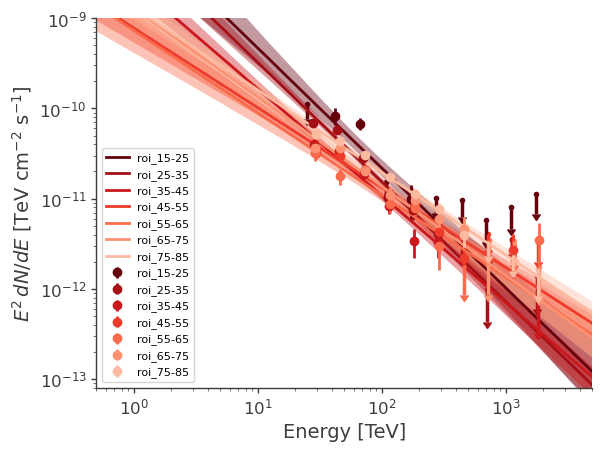

In [27]:
%matplotlib inline
import glob
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
ss = []
ssr= []
x_Max=5000.
x_Min=0.5
y_Min=0.8e-13
y_Max=1e-9
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files): #[:7]
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    resultdict = resultsss.get_data_frame()
    gc.append(range(20,360,10)[i])
    dk.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    try:
        dkf.append(resultsall[i][2][0])
    except:
        resultfile = np.load(f"../res/Diffuse_WCDA_case10/resultsall.npy")
        dkf = resultfile[9]
    if i < 7:
        # try:
        plot_spectra(
            resultsss,
            sources_to_use=["Diffuse"],
            include_extended=True,
            ene_min=x_Min,
            ene_max=x_Max,
            num_ene=30,
            energy_unit="TeV",
            flux_unit=f"TeV/(s cm2)", #*
            subplot=ax,
            plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
            )
        try:
            data = my.Draw_spectrum_fromfile(subfolder+"Spectrum_Diffuse.txt", label=name, color=my.red_palette[-(i+1)], subplot=ax, scale=1/dkf[i])
        except:
            pass
        # except Exception as e:
        #     print(f"Error: {e}")
        #     continue
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall.npy",results)
from threeML.analysis_results import AnalysisResultsSet
resultsall
rrr = [it[0][0].results for it in resultsall]
analysis_set = AnalysisResultsSet(rrr)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)

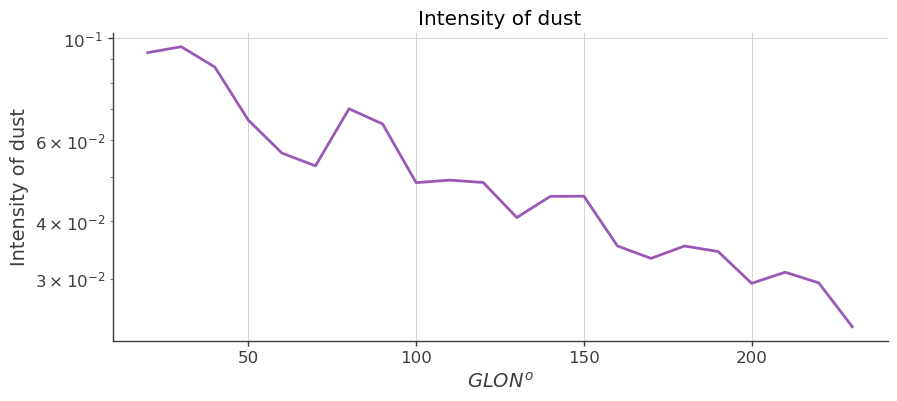

In [21]:
plt.figure(figsize=(10,4)) #
plt.plot(gc, np.array(dkf)) #np.array(den)*1e9, np.array(dep)*1e9 , fmt="o"
plt.yscale("log")
plt.title("Intensity of dust")

plt.ylabel(r"Intensity of dust")
# plt.ylim(1e-7, 1e-4)
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/dust.png",dpi=300)
plt.savefig(f"../res/{region_name}/dust.pdf",dpi=300)

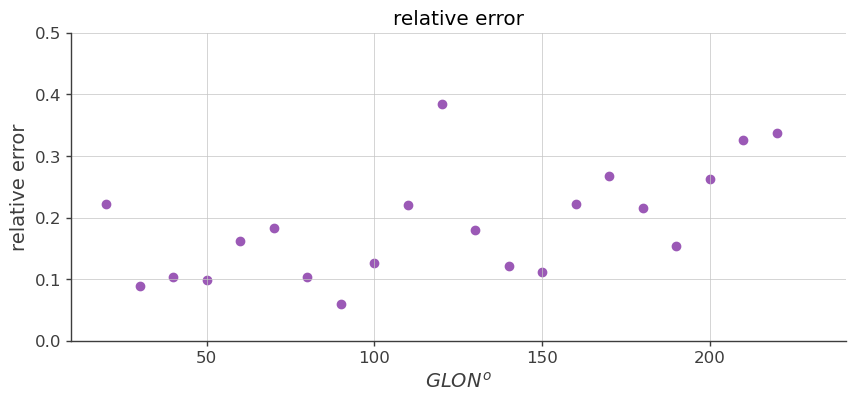

In [22]:
plt.figure(figsize=(10,4)) #
plt.scatter(gc, (np.array(de)*1e9)/(np.array(dk)*1e9), marker="o") #np.array(den)*1e9, np.array(dep)*1e9
# plt.yscale("log")
plt.title("relative error")
plt.ylim(0, 0.5)
plt.ylabel("relative error")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

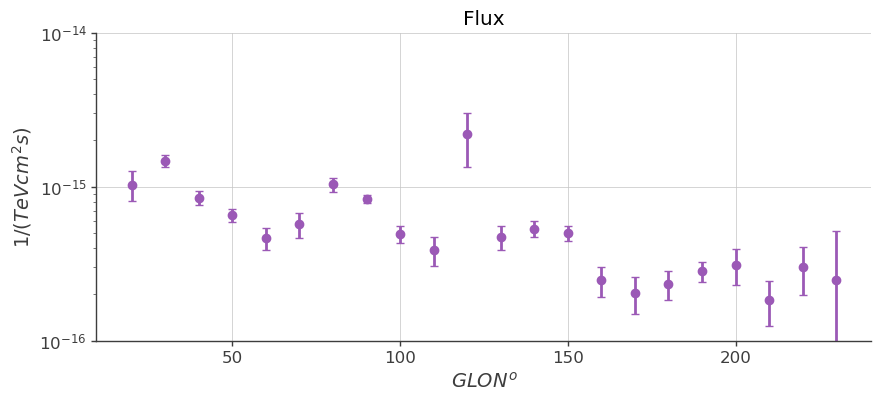

In [28]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-16, 1e-14)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

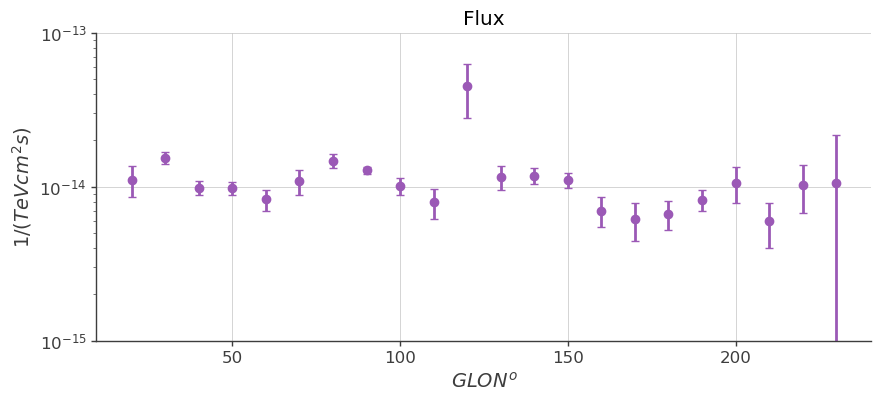

In [29]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-15, 1e-13)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

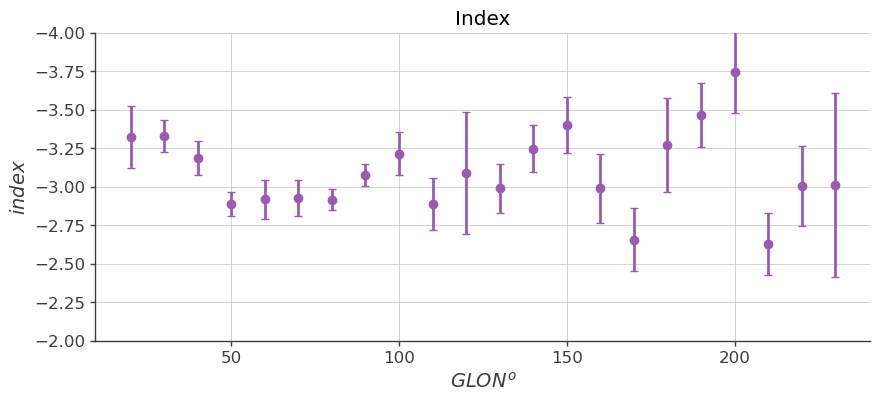

In [25]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o", capsize=3) #dien, diep
plt.ylim(-2,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)